In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Display all of the columns
pd.set_option('display.max_columns', None)

In [2]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("../Resources/loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<Figure size 800x600 with 0 Axes>

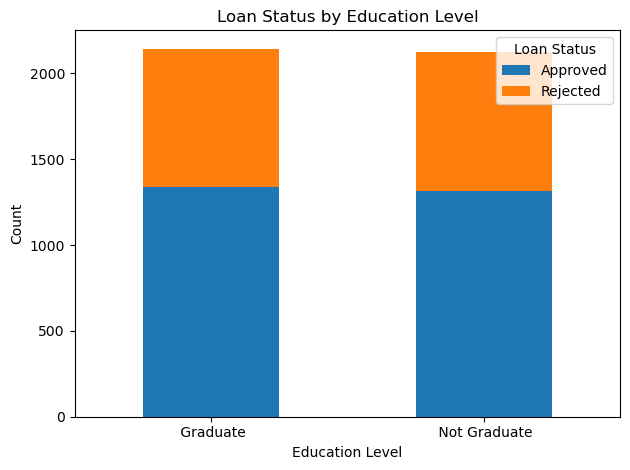

In [3]:
# Check for leading/trailing whitespaces in the column names
data.columns = data.columns.str.strip()

if 'education' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['education', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

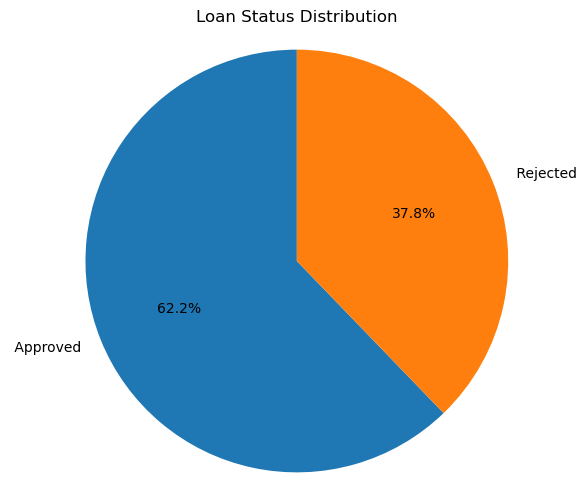

In [4]:
# Count the number of occurrences for each loan status
loan_status_counts = data['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Figure size 800x600 with 0 Axes>

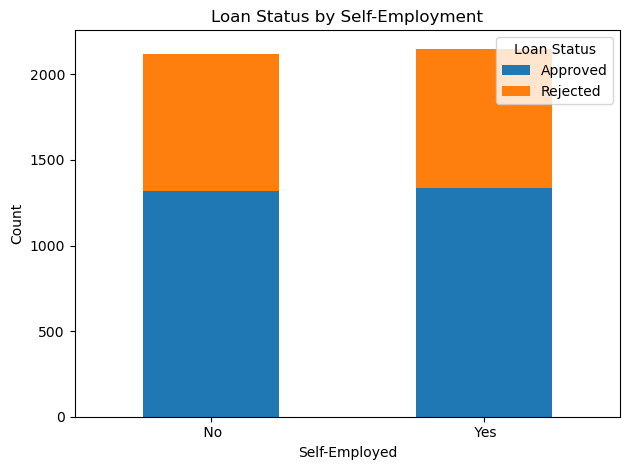

In [5]:
data.columns = data.columns.str.strip()

if 'self_employed' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['self_employed', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Self-Employment')
    plt.xlabel('Self-Employed')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 0 Axes>

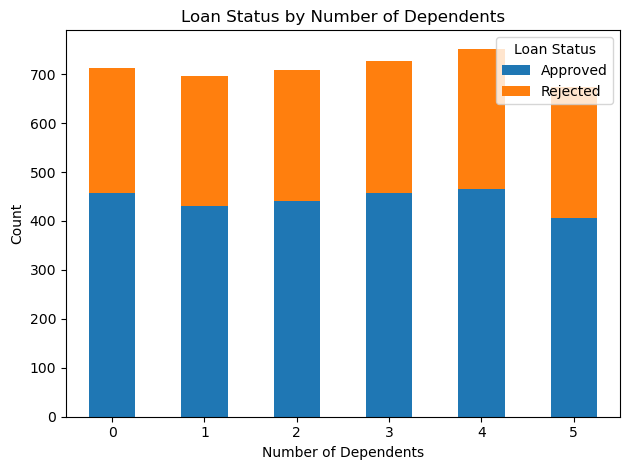

In [6]:
if 'no_of_dependents' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['no_of_dependents', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Number of Dependents')
    plt.xlabel('Number of Dependents')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

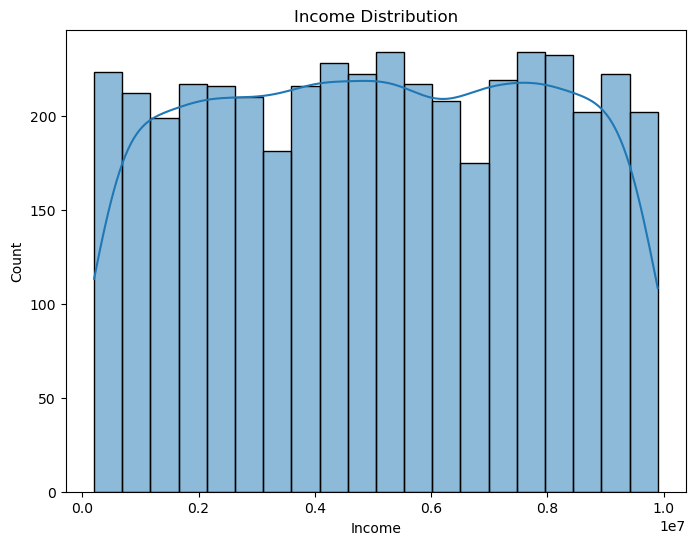

In [7]:
# Distribution of 'income_annum'
plt.figure(figsize=(8, 6))
sns.histplot(data['income_annum'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

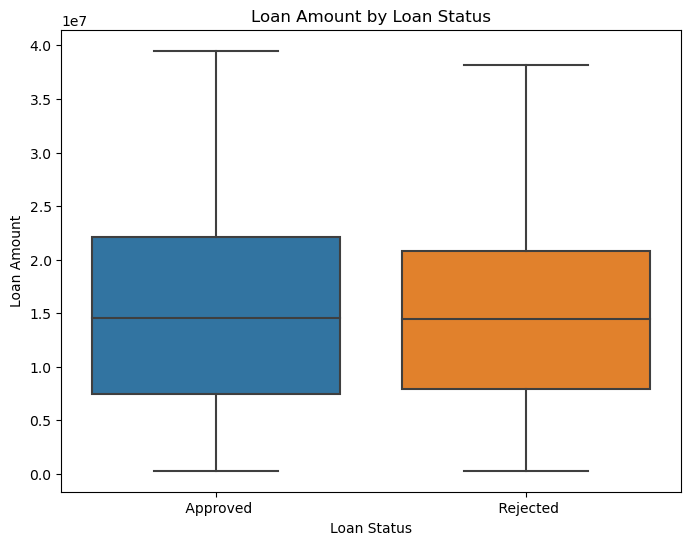

In [8]:
# Box plot for 'loan_amount' by 'loan_status'
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=data)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

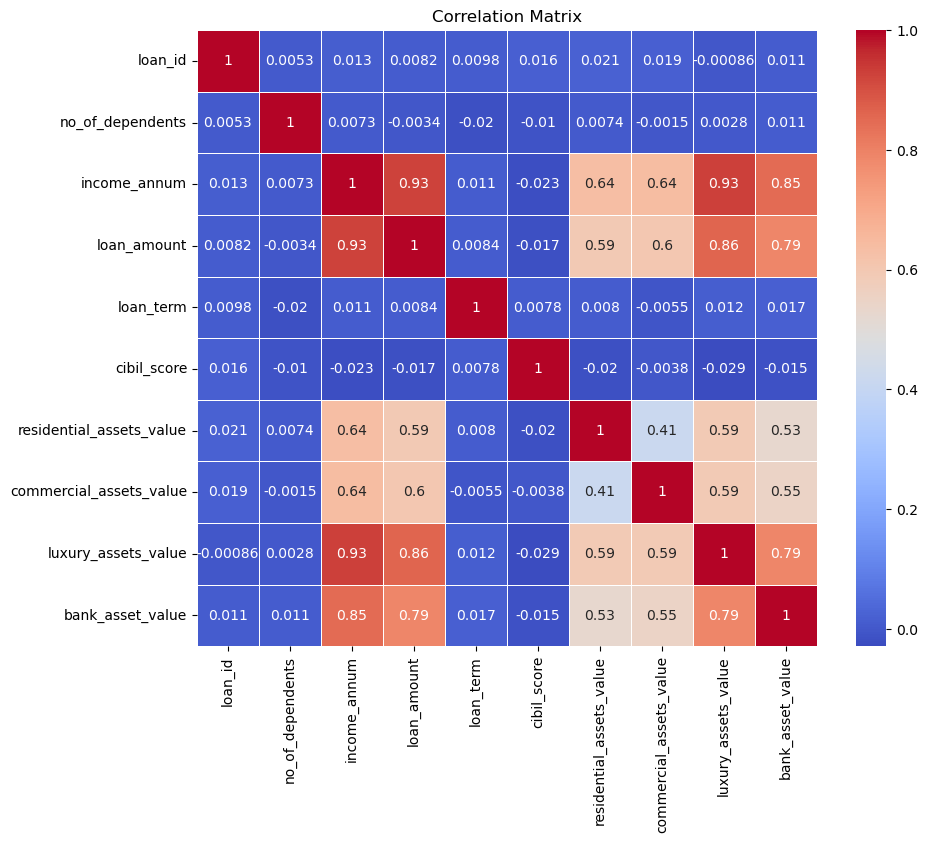

In [9]:
# Correlation matrix for numeric features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

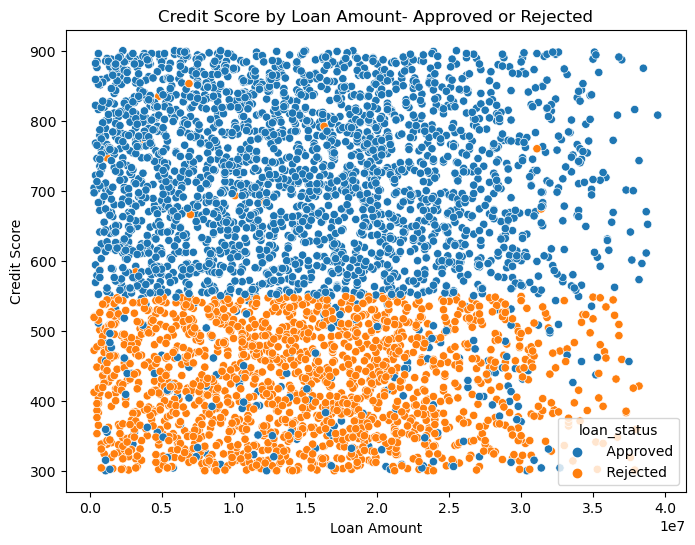

In [10]:
# Looking at credit score and loan status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amount', y='cibil_score', hue='loan_status', data=data, legend='auto', markers=True)
plt.title('Credit Score by Loan Amount- Approved or Rejected')
plt.xlabel('Loan Amount')
plt.ylabel('Credit Score')
plt.show()

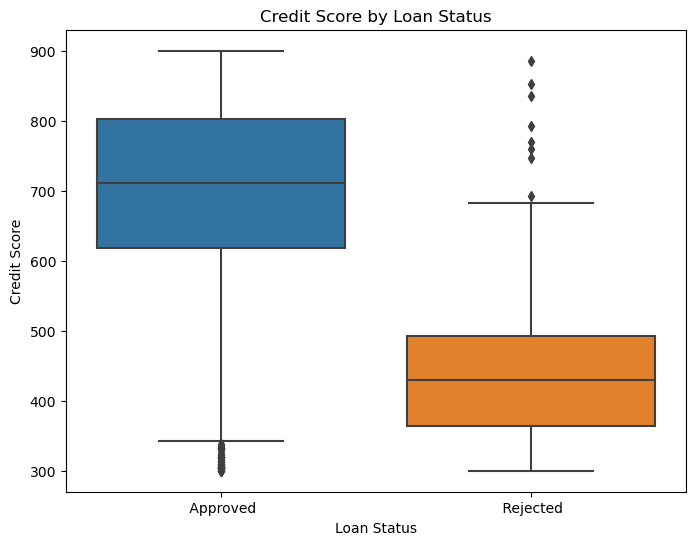

In [11]:
# Box plot for 'loan_amount' by 'loan_status'
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=data)
plt.title('Credit Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

In [12]:
import plotly.express as px

# Assuming you have your dataset loaded into a DataFrame named df

# Create the violin plot
fig = px.violin(data, x='loan_status', y='cibil_score', box=True, points="all")

# Customize the plot layout and appearance (optional)
fig.update_layout(
    title="Credit Score Distribution by Loan Status",
    xaxis_title="Loan Status",
    yaxis_title="Credit Score",
)

# Show the interactive plot

fig.show()